In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
cd gdrive/MyDrive/PHD/SemEval2023

/content/gdrive/MyDrive/PHD/SemEval2023


In [ ]:
import pandas as pd

data = pd.read_csv("Data/starting_ki/train_all_tasks.csv")
# dfa = pd.read_csv("Data/dev_task_a_entries.csv")
# dfb = pd.read_csv("Data/dev_task_b_entries.csv")
# dfc = pd.read_csv("Data/dev_task_c_entries.csv")

In [ ]:
data

,rewire_id,text,label_sexist,label_category,label_vector
0,sexism2022_english-7358,"Damn, this writing was pretty chaotic",not sexist,none,none
1,sexism2022_english-2367,"Yeah, and apparently a bunch of misogynistic v...",not sexist,none,none
2,sexism2022_english-3073,How the FUCK is this woman still an MP!!!???,not sexist,none,none
3,sexism2022_english-14895,Understand. Know you're right. At same time I ...,not sexist,none,none
4,sexism2022_english-4118,Surprized they didn't stop and rape some women,not sexist,none,none
...,...,...,...,...,...
13995,sexism2022_english-14185,complexes like the 'nice chicks' that go after...,sexist,2. derogation,2.1 descriptive attacks
13996,sexism2022_english-18629,"""GRAPHIC Germany - Muslim ""refugee"" stabbing h...",not sexist,none,none
13997,sexism2022_english-3320,Lol I imagine there would be simps that are li...,not sexist,none,none
13998,sexism2022_english-13309,"It's not, the girls I go on dates with don't k...",not sexist,none,none


In [ ]:
task = "1c"

In [ ]:
if not task.endswith("a"):
  data = data[data["label_category"]!="none"]

In [ ]:
if task.endswith("a"):
  label_column = "label_sexist"
elif task.endswith("b"):
  label_column = "label_category"
elif task.endswith("c"):
  label_column = "label_vector"


label_column

'label_vector'

In [ ]:
data[["text", label_column]].groupby(label_column).count()

,text
label_vector,
1.1 threats of harm,56
1.2 incitement and encouragement of harm,254
2.1 descriptive attacks,717
2.2 aggressive and emotive attacks,673
2.3 dehumanising attacks & overt sexual objectification,200
"3.1 casual use of gendered slurs, profanities, and insults",637
3.2 immutable gender differences and gender stereotypes,417
3.3 backhanded gendered compliments,64
3.4 condescending explanations or unwelcome advice,47


In [ ]:
# label_values = data[label_column].unique()
# label_values

if label_column == "label_category":
  label_values = [
      '1. threats, plans to harm and incitement',
      '2. derogation',
      '3. animosity',
      '4. prejudiced discussions',
  ]

  label_map = {
      0: '1. threats, plans to harm and incitement',
      1: '2. derogation', 
      2: '3. animosity', 
      3: '4. prejudiced discussions',
      '1. threats, plans to harm and incitement':0,
      '2. derogation':1,
      '3. animosity':2,
      '4. prejudiced discussions':3,
  }
elif label_column == "label_vector":
  label_values = [
      '1.1 threats of harm',
      '1.2 incitement and encouragement of harm',
      '2.1 descriptive attacks',
      '2.2 aggressive and emotive attacks',
      '2.3 dehumanising attacks & overt sexual objectification',
      '3.1 casual use of gendered slurs, profanities, and insults',
      '3.2 immutable gender differences and gender stereotypes',
      '3.3 backhanded gendered compliments',
      '3.4 condescending explanations or unwelcome advice',
      '4.1 supporting mistreatment of individual women',
      '4.2 supporting systemic discrimination against women as a group',
  ]

  label_map = {
      0: '1.1 threats of harm',
      1: '1.2 incitement and encouragement of harm',
      2: '2.1 descriptive attacks',
      3: '2.2 aggressive and emotive attacks',
      4: '2.3 dehumanising attacks & overt sexual objectification',
      5: '3.1 casual use of gendered slurs, profanities, and insults',
      6: '3.2 immutable gender differences and gender stereotypes',
      7: '3.3 backhanded gendered compliments',
      8: '3.4 condescending explanations or unwelcome advice',
      9: '4.1 supporting mistreatment of individual women',
      10: '4.2 supporting systemic discrimination against women as a group',
      '1.1 threats of harm': 0,
      '1.2 incitement and encouragement of harm': 1,
      '2.1 descriptive attacks': 2,
      '2.2 aggressive and emotive attacks': 3,
      '2.3 dehumanising attacks & overt sexual objectification': 4,
      '3.1 casual use of gendered slurs, profanities, and insults': 5,
      '3.2 immutable gender differences and gender stereotypes': 6,
      '3.3 backhanded gendered compliments': 7,
      '3.4 condescending explanations or unwelcome advice': 8,
      '4.1 supporting mistreatment of individual women': 9,
      '4.2 supporting systemic discrimination against women as a group': 10,
  }
else:
  raise Exception("Unknown label column")

In [ ]:
texts = data['text'].values

def label_to_number(label_map, label):
  return label_map[label]

labels = [label_to_number(label_map, d) for d in data[label_column].values]

In [ ]:
text_lengths = [len(texts[i].split()) for i in range(len(texts))]
print(min(text_lengths))
print(max(text_lengths))

2
54


# Prepare Data

In [ ]:
!pip install -q transformers

In [ ]:
import transformers

In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

print('Original Text: ', texts[0], '\n')
print('Tokenized Text: ', tokenizer.tokenize(texts[0]), '\n')
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(texts[0])))


Original Text:  just the inside of your wallet: cash, bank cards, credit cards, debit cards. That is the inside that matters to femoids. 

Tokenized Text:  ['just', 'the', 'inside', 'of', 'your', 'wallet', ':', 'cash', ',', 'bank', 'cards', ',', 'credit', 'cards', ',', 'de', '##bit', 'cards', '.', 'that', 'is', 'the', 'inside', 'that', 'matters', 'to', 'fe', '##mo', '##ids', '.'] 

Token IDs:  [2074, 1996, 2503, 1997, 2115, 15882, 1024, 5356, 1010, 2924, 5329, 1010, 4923, 5329, 1010, 2139, 16313, 5329, 1012, 2008, 2003, 1996, 2503, 2008, 5609, 2000, 10768, 5302, 9821, 1012]


In [ ]:
text_ids = [tokenizer.encode(text, max_length=100, padding='max_length', truncation=True) for text in texts]

In [ ]:
text_ids_lengths = [len(text_ids[i]) for i in range(len(text_ids))]
print(min(text_ids_lengths))
print(max(text_ids_lengths))


100
100


In [ ]:
att_masks = []
for ids in text_ids:
    masks = [int(id > 0) for id in ids]
    att_masks.append(masks)

In [ ]:
import torch
from sklearn.model_selection import train_test_split

train_x, test_val_x, train_y, test_val_y = train_test_split(text_ids, labels, random_state=42, test_size=0.2)
train_m, test_val_m = train_test_split(att_masks, random_state=42, test_size=0.2)

test_x, val_x, test_y, val_y = train_test_split(test_val_x, test_val_y, random_state=42, test_size=0.5)
test_m, val_m = train_test_split(test_val_m, random_state=42, test_size=0.5)


## Convert to tensor
train_x = torch.tensor(train_x);
test_x = torch.tensor(test_x);
val_x = torch.tensor(val_x);
train_y = torch.tensor(train_y);
test_y = torch.tensor(test_y);
val_y = torch.tensor(val_y);
train_m = torch.tensor(train_m);
test_m = torch.tensor(test_m);
val_m = torch.tensor(val_m);

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

batch_size = 32

train_data = TensorDataset(train_x, train_m, train_y)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

val_data = TensorDataset(val_x, val_m, val_y)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

## Load Model

In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

num_labels = len(set(labels))

model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_labels, output_attentions=False, output_hidden_states=False)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

print(device)

cuda


In [ ]:
# def count_parameters(model):
#     return sum(p.numel() for p in model.parameters() if p.requires_grad)

# print('Number of trainable parameters:', count_parameters(model), '\n', model)


## Fine-tune

In [ ]:
learning_rate = 1e-5
adam_epsilon = 1e-8

no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.2},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.0}
]

optimizer = torch.optim.AdamW(optimizer_grouped_parameters, lr=learning_rate, eps=adam_epsilon)

In [ ]:
from transformers import get_linear_schedule_with_warmup

num_epochs = 4
total_steps = len(train_dataloader) * num_epochs

scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)


In [ ]:
import time
import numpy as np
import random

seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)


def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs


In [ ]:
train_losses = []
val_losses = []
num_mb_train = len(train_dataloader)
num_mb_val = len(val_dataloader)

if num_mb_val == 0:
    num_mb_val = 1

for n in range(num_epochs):
    train_loss = 0
    val_loss = 0
    start_time = time.time()
    
    for k, (mb_x, mb_m, mb_y) in enumerate(train_dataloader):
        optimizer.zero_grad()
        model.train()
        
        mb_x = mb_x.to(device)
        mb_m = mb_m.to(device)
        mb_y = mb_y.to(device)
        
        outputs = model(mb_x, attention_mask=mb_m, labels=mb_y)
        
        loss = outputs[0]
        #loss = model_loss(outputs[1], mb_y)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()
        
        train_loss += loss.data / num_mb_train
    
    print ("\nTrain loss after itaration %i: %f" % (n+1, train_loss))
    train_losses.append(train_loss.cpu())
    
    with torch.no_grad():
        model.eval()
        
        for k, (mb_x, mb_m, mb_y) in enumerate(val_dataloader):
            mb_x = mb_x.to(device)
            mb_m = mb_m.to(device)
            mb_y = mb_y.to(device)
        
            outputs = model(mb_x, attention_mask=mb_m, labels=mb_y)
            
            loss = outputs[0]
            #loss = model_loss(outputs[1], mb_y)
            
            val_loss += loss.data / num_mb_val
            
        print ("Validation loss after itaration %i: %f" % (n+1, val_loss))
        val_losses.append(val_loss.cpu())
    
    end_time = time.time()
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    print(f'Time: {epoch_mins}m {epoch_secs}s')



Train loss after itaration 1: 2.173822
Validation loss after itaration 1: 1.958668
Time: 0m 45s

Train loss after itaration 2: 1.892024
Validation loss after itaration 2: 1.809942
Time: 0m 43s

Train loss after itaration 3: 1.751459
Validation loss after itaration 3: 1.740450
Time: 0m 43s

Train loss after itaration 4: 1.685805
Validation loss after itaration 4: 1.709975
Time: 0m 44s


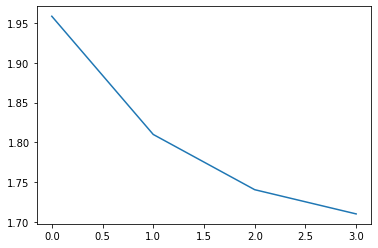

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure()
plt.plot(val_losses)

In [ ]:
import pickle
import os

out_dir = f'./Models/{task}_fine-tuned-bert'

if not os.path.exists(out_dir):
    os.makedirs(out_dir)
    
model_to_save = model.module if hasattr(model, 'module') else model
model_to_save.save_pretrained(out_dir)
tokenizer.save_pretrained(out_dir)


('./Models/1c_fine-tuned-bert/tokenizer_config.json',
 './Models/1c_fine-tuned-bert/special_tokens_map.json',
 './Models/1c_fine-tuned-bert/vocab.txt',
 './Models/1c_fine-tuned-bert/added_tokens.json')

## Run prediction

In [ ]:
out_dir = f'./Models/{task}_fine-tuned-bert'

model = BertForSequenceClassification.from_pretrained(out_dir)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)


In [ ]:
batch_size = 32

test_data = TensorDataset(test_x, test_m)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

outputs = []
with torch.no_grad():
    model.eval()
    for k, (mb_x, mb_m) in enumerate(test_dataloader):
        mb_x = mb_x.to(device)
        mb_m = mb_m.to(device)
        output = model(mb_x, attention_mask=mb_m)
        outputs.append(output[0].to('cpu'))

outputs = torch.cat(outputs)


In [ ]:
_, predicted_values = torch.max(outputs, 1)
predicted_values = predicted_values.numpy()
true_values = test_y.numpy()


In [ ]:
test_accuracy = np.sum(predicted_values == true_values) / len(true_values)
print ("Test Accuracy:", test_accuracy)


Test Accuracy: 0.4470588235294118


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(true_values, predicted_values, target_names=[str(l) for l in label_values]))


                                                                 precision    recall  f1-score   support

                                            1.1 threats of harm       0.00      0.00      0.00         5
                       1.2 incitement and encouragement of harm       0.56      0.41      0.47        22
                                        2.1 descriptive attacks       0.39      0.82      0.53        84
                             2.2 aggressive and emotive attacks       0.41      0.49      0.45        71
        2.3 dehumanising attacks & overt sexual objectification       0.00      0.00      0.00        23
     3.1 casual use of gendered slurs, profanities, and insults       0.62      0.67      0.64        58
        3.2 immutable gender differences and gender stereotypes       0.00      0.00      0.00        37
                            3.3 backhanded gendered compliments       0.00      0.00      0.00         5
             3.4 condescending explanations or unwelco

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import itertools

# plot confusion matrix
# code borrowed from scikit-learn.org
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[ 0  0  0  5  0  0  0  0  0  0  0]
 [ 0  9  2 11  0  0  0  0  0  0  0]
 [ 0  4 69 11  0  0  0  0  0  0  0]
 [ 0  1 19 35  0 16  0  0  0  0  0]
 [ 0  0 14  5  0  4  0  0  0  0  0]
 [ 0  0  9 10  0 39  0  0  0  0  0]
 [ 0  0 35  1  0  1  0  0  0  0  0]
 [ 0  0  5  0  0  0  0  0  0  0  0]
 [ 0  0  1  1  0  1  0  0  0  0  0]
 [ 0  1  1  4  0  1  0  0  0  0  0]
 [ 0  1 20  3  0  1  0  0  0  0  0]]


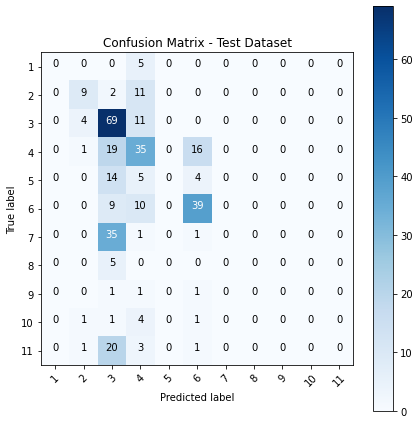

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

cm_test = confusion_matrix(true_values, predicted_values)

np.set_printoptions(precision=2)

plt.figure(figsize=(6,6))
plot_confusion_matrix(cm_test, classes=range(1, len(label_values)+1), title='Confusion Matrix - Test Dataset')
# plt.figure(figsize=(6,6))
# plot_confusion_matrix(cm_test, classes=label_values, title='Confusion Matrix - Test Dataset', normalize=True)


## Create Submission

In [ ]:
dfb = pd.read_csv("Data/dev_task_b_entries.csv")
dfc = pd.read_csv("Data/dev_task_c_entries.csv")

In [ ]:
texts = dfb['text'].values

In [ ]:
text_ids = [tokenizer.encode(text, max_length=100, padding='max_length') for text in texts]

In [ ]:
att_masks = []
for ids in text_ids:
    masks = [int(id > 0) for id in ids]
    att_masks.append(masks)

In [ ]:
test_x = torch.tensor(text_ids);
test_m = torch.tensor(att_masks);

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

batch_size = 32
test_data = TensorDataset(test_x, test_m)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

outputs = []
with torch.no_grad():
    model.eval()
    for k, (mb_x, mb_m) in enumerate(test_dataloader):
        mb_x = mb_x.to(device)
        mb_m = mb_m.to(device)
        output = model(mb_x, attention_mask=mb_m)
        outputs.append(output[0].to('cpu'))

outputs = torch.cat(outputs)
_, predicted_values = torch.max(outputs, 1)
predicted_values = predicted_values.numpy()

In [ ]:
def number_to_label(label):
  return label_map[label]

predicted_labels = list(map(number_to_label, predicted_values))

In [ ]:
dfb["label_pred"] = predicted_labels

In [ ]:
dfb[["rewire_id", "label_pred"]].to_csv(f"Results/{task}_bert.csv", index=False)